Importing Important Libraries

In [1]:
import warnings
import math
warnings.filterwarnings('ignore')

# import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

# Plots and stats
import matplotlib.pyplot as plt
import seaborn as sns

# Label Encoding & Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier

# Model Building
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.pipeline import Pipeline
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV

Importing Dataset

In [2]:
df = pd.read_csv("D:\SEM_4\Machine learning\ML project\credit_risk_dataset_NEW.csv.xls")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Data Cleaning

In [3]:
# Copying DataFrame df
df_encoded = df.copy()

# Define label encoders and columns to encode
label_encoders = {}
columns_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Encoding categorical columns and replacing them with encoded versions
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

df_encoded.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [4]:
# Loop through each column to check encoding
for column in columns_to_encode:
    original_values = df[column].unique()
    encoded_column = column
    encoded_values = df_encoded[encoded_column].unique()

    print(f"{column}:")
    for orig, enc in zip(original_values, encoded_values):
        print(f"'{orig}' in df --> '{enc}'")

person_home_ownership:
'RENT' in df --> '3'
'OWN' in df --> '2'
'MORTGAGE' in df --> '0'
'OTHER' in df --> '1'
loan_intent:
'PERSONAL' in df --> '4'
'EDUCATION' in df --> '1'
'MEDICAL' in df --> '3'
'VENTURE' in df --> '5'
'HOMEIMPROVEMENT' in df --> '2'
'DEBTCONSOLIDATION' in df --> '0'
loan_grade:
'D' in df --> '3'
'B' in df --> '1'
'C' in df --> '2'
'A' in df --> '0'
'E' in df --> '4'
'F' in df --> '5'
'G' in df --> '6'
cb_person_default_on_file:
'Y' in df --> '1'
'N' in df --> '0'


In [5]:
df_encoded['cb_person_default_on_file'].value_counts()

0    26836
1     5745
Name: cb_person_default_on_file, dtype: int64

In [6]:
df_encoded.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,31686.000000,32581.000000,32581.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,1.676222,4.789686,2.533839,1.218195,9589.371106,11.011695,0.218164,0.170203,0.176330,5.804211
std,6.348078,6.198312e+04,1.433116,4.142630,1.731182,1.166336,6322.086646,3.240459,0.413006,0.106782,0.381106,4.055001
min,20.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.900000,0.000000,0.090000,0.000000,3.000000
50%,26.000000,5.500000e+04,3.000000,4.000000,3.000000,1.000000,8000.000000,10.990000,0.000000,0.150000,0.000000,4.000000
75%,30.000000,7.920000e+04,3.000000,7.000000,4.000000,2.000000,12200.000000,13.470000,0.000000,0.230000,0.000000,8.000000
max,144.000000,6.000000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,1.000000,0.830000,1.000000,30.000000


In [7]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int32  
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  int32  
 5   loan_grade                  32581 non-null  int32  
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int32  
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int32(4), int64(5)
memory usage: 2.5 MB


In [8]:
df_encoded.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
#Filling NA/missing values
df_encoded.fillna(df_encoded["loan_int_rate"].mean(),inplace=True)
df_encoded.fillna(df_encoded["person_emp_length"].mean(),inplace=True)

Coloumn Selection

Splitting Sets

Text(0, 0.5, 'Frequency')

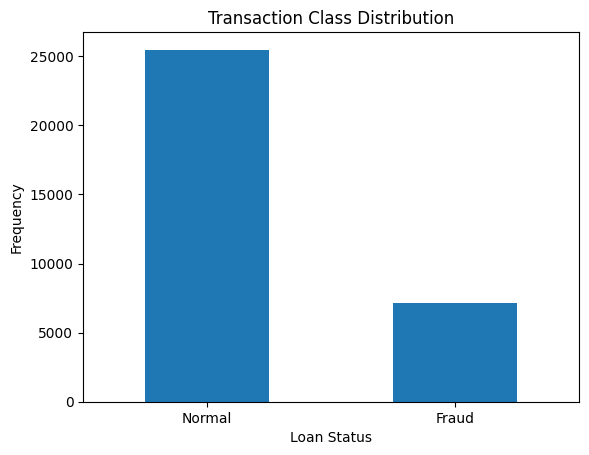

In [10]:
LABELS = ["Normal", "Fraud"]
count_classes = pd.value_counts(df_encoded['loan_status'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Loan Status")

plt.ylabel("Frequency")

SVM implementation

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [12]:

cols_to_del = ['loan_status','person_age','person_home_ownership','loan_intent',]
X = df_encoded.drop(cols_to_del, axis=1)
y = df_encoded['loan_status']


Oversampling 

In [13]:
# undersampling
from imblearn.under_sampling import RandomUnderSampler
 
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

In [14]:
# oversampler = RandomOverSampler(random_state=42)
# X_oversampled, y_oversampled = oversampler.fit_resample(X,y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)
# Standardize features by removing the mean and scaling to unit variance

#Scalling the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0, 0.5, 'Frequency')

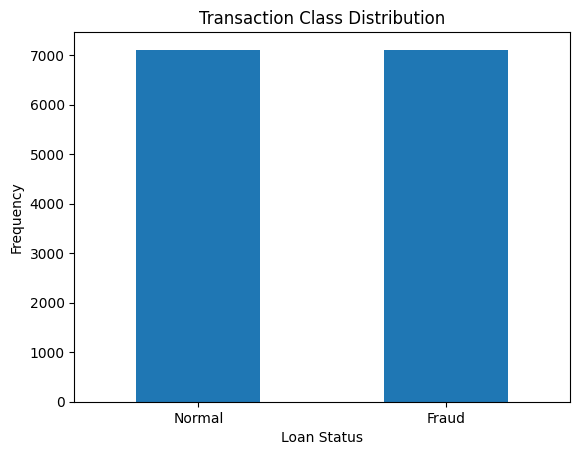

In [16]:
count_classes = pd.value_counts(y_undersampled, sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Loan Status")
plt.ylabel("Frequency")

SVM kernel Analysis

In [17]:
# 1. RBF
svm1 = SVC(kernel='rbf', random_state=42)
svm1.fit(X_train_scaled, y_train)
y_pred_1 = svm1.predict(X_test_scaled)

accuracy_1 = accuracy_score(y_test, y_pred_1)
precision_1 = precision_score(y_test, y_pred_1)
recall_1 = recall_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1)

print("Accuracy:", accuracy_1)
print("Precision:", precision_1)
print("Recall:", recall_1)
print("F1-score:", f1_1)

Accuracy: 0.8023909985935302
Precision: 0.8304140127388535
Recall: 0.7492816091954023
F1-score: 0.7877643504531722


In [18]:
#2. Linear
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

accuracy_2 = accuracy_score(y_test, y_pred)
precision_2 = precision_score(y_test, y_pred)
recall_2 = recall_score(y_test, y_pred)
f1_2 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_2)
print("Precision:", precision_2)
print("Recall:", recall_2)
print("F1-score:", f1_2)

Accuracy: 0.7837552742616034
Precision: 0.7892777364110201
Recall: 0.7614942528735632
F1-score: 0.7751371115173674


In [19]:
# 3. Polynomial
svm = SVC(kernel='poly', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

accuracy_3 = accuracy_score(y_test, y_pred)
precision_3 = precision_score(y_test, y_pred)
recall_3 = recall_score(y_test, y_pred)
f1_3 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_3)
print("Precision:", precision_3)
print("Recall:", recall_3)
print("F1-score:", f1_3)

Accuracy: 0.7679324894514767
Precision: 0.8439849624060151
Recall: 0.6451149425287356
F1-score: 0.7312703583061889


In [20]:
#4. sigmoid
svm = SVC(kernel='sigmoid', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

accuracy_4 = accuracy_score(y_test, y_pred)
precision_4 = precision_score(y_test, y_pred)
recall_4 = recall_score(y_test, y_pred)
f1_4 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy_4)
print("Precision:", precision_4)
print("Recall:", recall_4)
print("F1-score:", f1_4)

Accuracy: 0.689521800281294
Precision: 0.6793516560958421
Recall: 0.6925287356321839
F1-score: 0.6858769121309143


+------------+------------+-------------+----------+------------+
| Kernel     |   Accuracy |   Precision |   Recall |   F1-score |
+============+============+=============+==========+============+
| RBF        |   0.802391 |    0.830414 | 0.749282 |   0.787764 |
+------------+------------+-------------+----------+------------+
| Linear     |   0.783755 |    0.789278 | 0.761494 |   0.775137 |
+------------+------------+-------------+----------+------------+
| Polynomial |   0.767932 |    0.843985 | 0.645115 |   0.73127  |
+------------+------------+-------------+----------+------------+
| Sigmoid    |   0.689522 |    0.679352 | 0.692529 |   0.685877 |
+------------+------------+-------------+----------+------------+


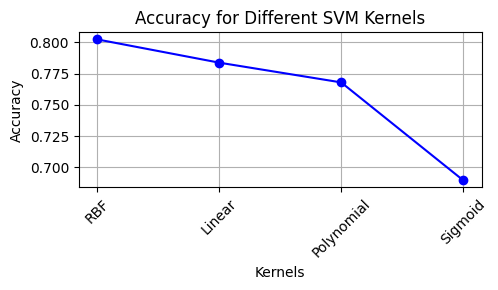

In [29]:
from tabulate import tabulate
data = [
    ["RBF", accuracy_1, precision_1, recall_1, f1_1],
    ["Linear", accuracy_2, precision_2, recall_2, f1_2],
    ["Polynomial", accuracy_3, precision_3, recall_3, f1_3],
    ["Sigmoid", accuracy_4, precision_4, recall_4, f1_4]
]

headers = ["Kernel", "Accuracy", "Precision", "Recall", "F1-score"]

print(tabulate(data, headers=headers, tablefmt="grid"))


import matplotlib.pyplot as plt
accuracy_values = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]
kernel_names = ["RBF", "Linear", "Polynomial", "Sigmoid"]

plt.figure(figsize=(5,3))
plt.plot(kernel_names, accuracy_values, marker='o', color='b', linestyle='-')
plt.title('Accuracy for Different SVM Kernels')
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Hyper Tuning for c and gamma in RBF function 


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Shuffle and split the data
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the predefined values for C and gamma
C_value = 1
gamma_value = 0.5

# Train SVM classifier with predefined values
svm_classifier = SVC(kernel='rbf', C=C_value, gamma=gamma_value, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8551480742673009
Precision: 0.7215189873417721
Recall: 0.5296640457469621
F1-score: 0.6108821104699094


c = 1 and gamma = 0.5

"auto" for the gamma parameter means that the SVM algorithm will automatically determine the value of gamma based on some heuristic, usually involving the number of features in the dataset.

####  Dimentionality Reduction 

1. UMAP dimensionality Reduction

UMAP Results:
Accuracy: 0.7450773558368495
Precision: 0.7559478127398311
Recall: 0.7076149425287356
F1-score: 0.7309833024118738


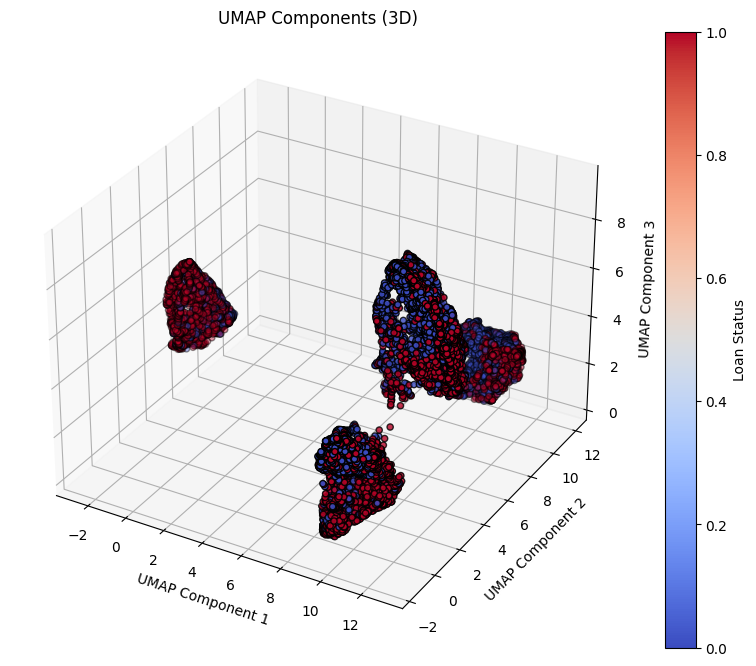

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
umap = UMAP(n_components=3)
X_train_umap_3d = umap.fit_transform(X_train_scaled)
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_umap_3d, y_train)
X_test_umap_3d = umap.transform(X_test_scaled)
y_pred = svm_classifier.predict(X_test_umap_3d)
accuracy_7 = accuracy_score(y_test, y_pred)
precision_7 = precision_score(y_test, y_pred)
recall_7 = recall_score(y_test, y_pred)
f1_7 = f1_score(y_test, y_pred)
print("UMAP Results:")
print("Accuracy:", accuracy_7)
print("Precision:", precision_7)
print("Recall:", recall_7)
print("F1-score:", f1_7)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_umap_3d[:, 0], X_train_umap_3d[:, 1], X_train_umap_3d[:, 2], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
ax.set_title('UMAP Components (3D)')

cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap=plt.cm.coolwarm, edgecolors='k'))
cbar.set_label('Loan Status')

plt.show()


PCA dimenionality Reduction

Accuracy: 0.7450773558368495
Precision: 0.7414916727009413
Recall: 0.735632183908046
F1-score: 0.7385503065272269


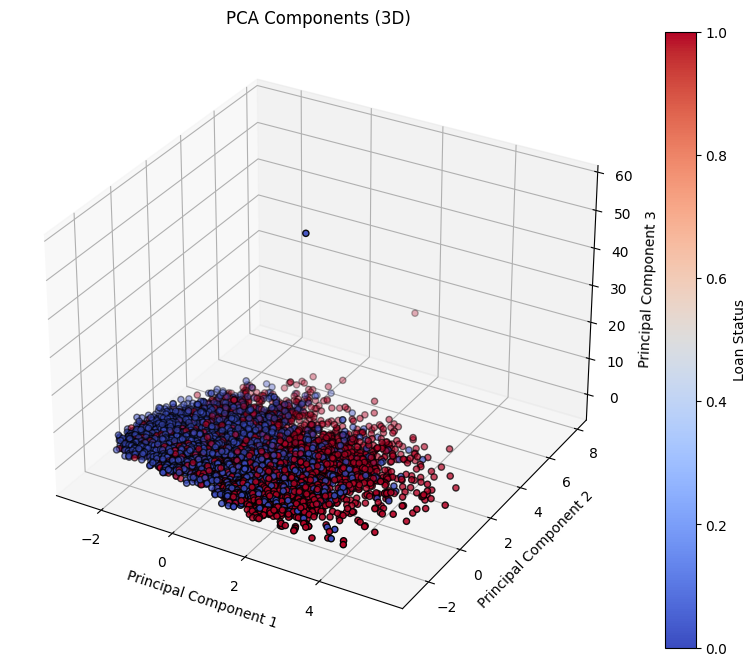

In [23]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.cm as cm
pca = PCA(n_components=3)
X_train_pca_3d = pca.fit_transform(X_train_scaled)

svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_pca_3d, y_train)

X_test_pca_3d = pca.transform(X_test_scaled)
y_pred_8 = svm_classifier.predict(X_test_pca_3d)

accuracy_8 = accuracy_score(y_test, y_pred_8)
precision_8 = precision_score(y_test, y_pred_8)
recall_8 = recall_score(y_test, y_pred_8)
f1_8 = f1_score(y_test, y_pred_8)
print("Accuracy:", accuracy_8)
print("Precision:", precision_8)
print("Recall:", recall_8)
print("F1-score:", f1_8)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca_3d[:, 0], X_train_pca_3d[:, 1], X_train_pca_3d[:, 2], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Components (3D)')

cbar = plt.colorbar(cm.ScalarMappable(cmap=plt.cm.coolwarm), ax=ax)
cbar.set_label('Loan Status')

plt.show()

The first principal component (PC1) will be a linear combination of these variables that captures the maximum variance in the data. The second principal component (PC2) will be another linear combination, orthogonal to the first, that captures the second-most variance, and so on.

TSNE dimentionality reduction

Accuracy: 0.6845991561181435
Precision: 0.6975259377494014
Recall: 0.6278735632183908
F1-score: 0.6608695652173913


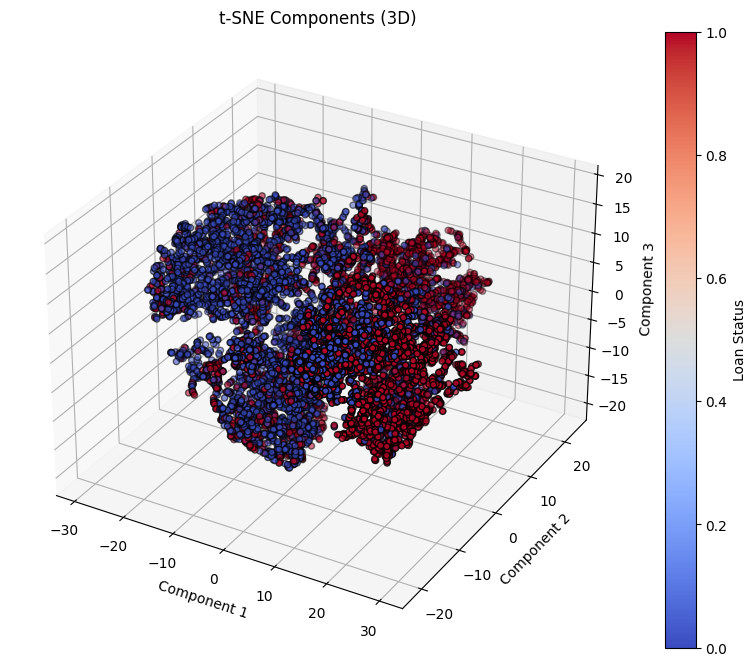

In [24]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.cm as cm

tsne = TSNE(n_components=3, random_state=42)
X_train_tsne_3d = tsne.fit_transform(X_train_scaled)

svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_tsne_3d, y_train)

X_test_tsne_3d = tsne.fit_transform(X_test_scaled) 
y_pred = svm_classifier.predict(X_test_tsne_3d)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_tsne_3d[:, 0], X_train_tsne_3d[:, 1], X_train_tsne_3d[:, 2], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('t-SNE Components (3D)')
cbar = plt.colorbar(cm.ScalarMappable(cmap=plt.cm.coolwarm), ax=ax)
cbar.set_label('Loan Status')

plt.show()


Dimensionality reduction techniques aim to capture the most important information in the data while discarding less relevant information. However, in this process of reducing dimensionality, some information may be lost, leading to a decrease in accuracy.

Confusion Matrix after applying RBF kernel

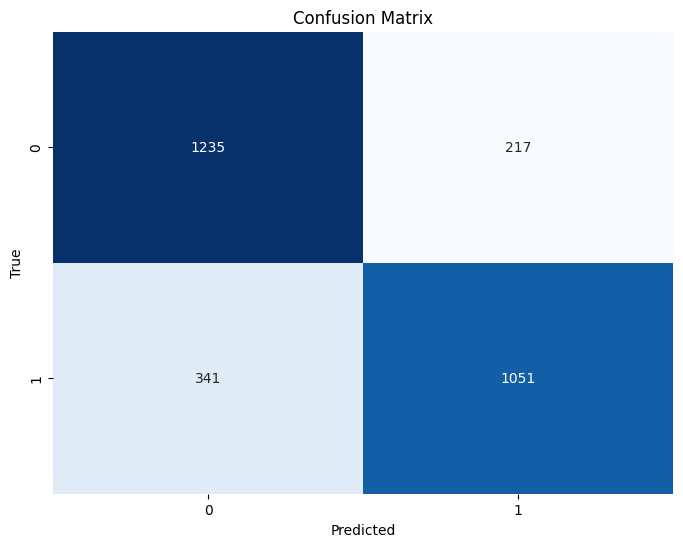

In [45]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

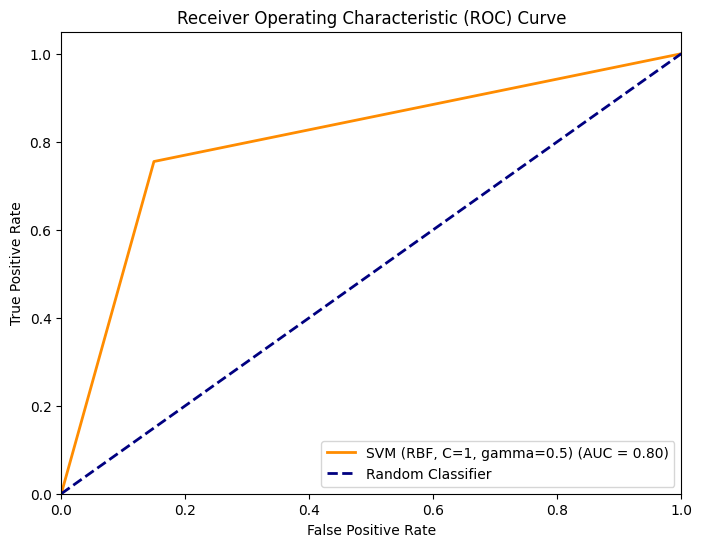

In [44]:
svm1 = SVC(kernel='rbf', C=1, gamma=0.5, random_state=42)
svm1.fit(X_train_scaled, y_train)
y_pred_1 = svm1.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM (RBF, C=1, gamma=0.5) (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

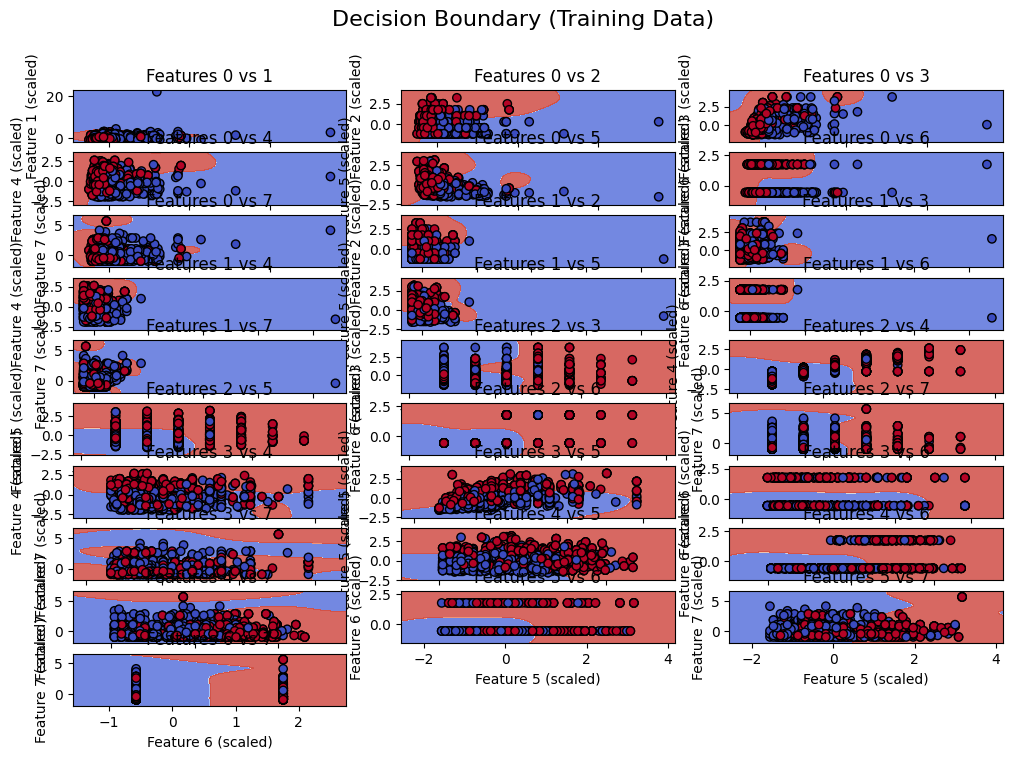

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import shuffle

def plot_decision_boundary(X, y, title):
    feature_combinations = combinations(range(X.shape[1]), 2)
    num_rows = (X.shape[1] * (X.shape[1] - 1)) // 2
    num_cols = min(3, num_rows)
    num_rows = (num_rows + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    axes = axes.ravel()

    for i, (feature1, feature2) in enumerate(feature_combinations):
        ax = axes[i]
        X_2d = X[:, [feature1, feature2]]

        # Train a separate SVM classifier for this pair of features
        svm_classifier_2d = SVC(kernel='rbf', random_state=42)
        svm_classifier_2d.fit(X_2d, y)

        h = .02  # step size in the mesh
        x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
        y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        input_data = np.c_[xx.ravel(), yy.ravel()]
        Z = svm_classifier_2d.predict(input_data)
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
        ax.set_xlabel(f'Feature {feature1} (scaled)')
        ax.set_ylabel(f'Feature {feature2} (scaled)')
        ax.set_title(f'Features {feature1} vs {feature2}')

    for i in range(i + 1, len(axes)):
        axes[i].set_visible(False)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

svm_classifier.fit(X_train_scaled, y_train)
plot_decision_boundary(X_train_scaled, y_train, "Decision Boundary (Training Data)")